In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
from datetime import timedelta

# visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

%matplotlib inline

# configure visualizations
sns.set_style('whitegrid')
figsize=(8,6)

In [2]:
def load_df(path, columns=None, use_threads=True):
    try:
        return pq.read_table(path, columns=columns, use_threads=use_threads).to_pandas()
    except Exception as e:
        print(e)

def downcast_ints(df):
    # downcast int types
    df_int = df.select_dtypes(include=['int'])
    converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')
    df[converted_int.columns] = converted_int
    
    return df
        
def prepare(path,cols):

    df = load_df(path,cols)
    df = df.reset_index(drop=True)
    df = downcast_ints(df)
    
    return df

In [3]:
def pieOthers(dfVars,dfVals,threshold):
    df = pd.DataFrame(
        data = {'var': dfVars, 'value' : dfVals},
        ).sort_values('value', ascending = False)
    
    if threshold > 0 :
        df2 = df[:threshold].copy()
        new_row = pd.DataFrame(data = {
            'var' : ['Others'],
            'value' : [dfVals[threshold:].sum()]
        })

        df2 = pd.concat([df2, new_row])
    else:
        df2 = df
        
    percent = 100.*df2['value']/df2['value'].sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df2['var'], percent)]
    #labels = ['{0} - {1}'.format(i,j) for i,j in zip(df2['var'], df2['value'])]
    
    colorsX = plt.cm.tab20.colors
    patches, texts = plt.pie(df2['value'], shadow=True, startangle=90, colors = colorsX)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


In [4]:
cols = ['network_type', 'mobile_network_type', 'mobile_data_status', 'mobile_data_activity', 'roaming_enabled', 'wifi_status', 'wifi_signal_strength', 'wifi_link_speed', 'wifi_ap_status', 'network_operator', 'sim_operator', 'mcc', 'mnc']
df = prepare('2-datasets/network_details.parquet',cols)

In [5]:
df.head(100)

,network_type,mobile_network_type,mobile_data_status,mobile_data_activity,roaming_enabled,wifi_status,wifi_signal_strength,wifi_link_speed,wifi_ap_status,network_operator,sim_operator,mcc,mnc
0,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-56,72,DISABLED,VERIZON,UNKNOWN,311,480
1,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-56,72,DISABLED,VERIZON,UNKNOWN,311,480
2,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-54,72,DISABLED,VERIZON,UNKNOWN,311,480
3,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-61,72,DISABLED,VERIZON,UNKNOWN,311,480
4,WIFI,LTE,DISCONNECTED,NONE,0,ENABLED,-63,72,DISABLED,VERIZON,UNKNOWN,311,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,UNKNOWN,LTE,DISCONNECTED,INOUT,0,ENABLED,-127,-1,DISABLED,MOCHE,MOCHE,268,06
96,UNKNOWN,LTE,DISCONNECTED,INOUT,0,ENABLED,-127,-1,DISABLED,MOCHE,MOCHE,268,06
97,UNKNOWN,LTE,DISCONNECTED,INOUT,0,ENABLED,-127,-1,DISABLED,MOCHE,MOCHE,268,06
98,UNKNOWN,LTE,DISCONNECTED,INOUT,0,ENABLED,-127,-1,DISABLED,MOCHE,MOCHE,268,06


In [6]:
dfNetworkTypeGB = df.groupby(['network_type'])['network_type'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfMobileNetworkTypeGB = df.groupby(['mobile_network_type'])['mobile_network_type'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfMobileDataStatusGB = df.groupby(['mobile_data_status'])['mobile_data_status'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfMobileDataActivityGB = df.groupby(['mobile_data_activity'])['mobile_data_activity'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfRoamingEnabledGB = df.groupby(['roaming_enabled'])['roaming_enabled'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfWifiStatusGB = df.groupby(['wifi_status'])['wifi_status'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfWifiApStatusGB = df.groupby(['wifi_ap_status'])['wifi_ap_status'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfNetworkOperatorGB = df.groupby(['network_operator'])['network_operator'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfSimOperatorGB = df.groupby(['sim_operator'])['sim_operator'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

dfRoamingEnabledGB['roaming_enabled'] = dfRoamingEnabledGB['roaming_enabled'].apply(lambda x: "No" if x == 0 else "Yes")


In [7]:
print("Network Details:"+str(len(df.index)))
print(dfMobileNetworkTypeGB['count'].sum())
print(dfNetworkOperatorGB['count'].sum())

Network Details:23533845
23533837
13442155


          network_type     count
5                 WIFI  11986480
4              UNKNOWN   6114227
2               MOBILE   5428354
0  BLUETOOTH TETHERING      3822
3              MOBILE2       952
1             ETHERNET        10


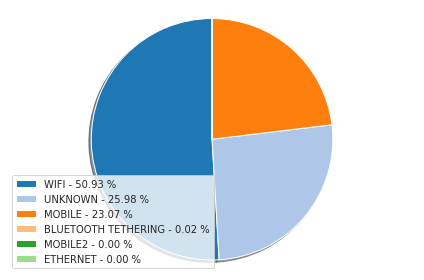

In [8]:
print(dfNetworkTypeGB)
pieOthers(dfNetworkTypeGB['network_type'],dfNetworkTypeGB['count'],0)

   mobile_network_type    count
19                 LTE  8518162
0                    0  5132853
16                HSPA  3489155
20                UTMS  2285309
17               HSPAP  1499011
10                EDGE  1216846
18               HSUPA   428347
15               HSDPA   402485
14                GPRS   230004
4                   18   171258
13              EVDO_A    89380
11               EHRPD    35213
6                1XRTT    27557
5                   19     5839
8                   30     1162
2                   16      676
3                   17      411
7                   20      115
1                  135       39
9                 CDMA       15


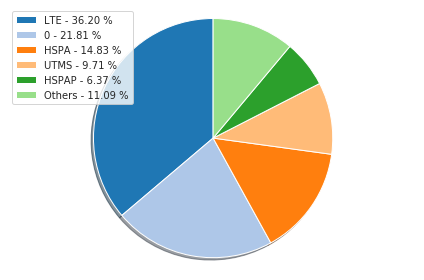

In [9]:
print(dfMobileNetworkTypeGB)
pieOthers(dfMobileNetworkTypeGB['mobile_network_type'],dfMobileNetworkTypeGB['count'],5)

  mobile_data_status     count
2       DISCONNECTED  18009034
0          CONNECTED   5462166
1         CONNECTING     38512
3          SUSPENDED     24133


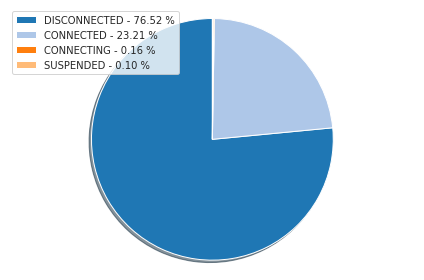

In [10]:
print(dfMobileDataStatusGB)
pieOthers(dfMobileDataStatusGB['mobile_data_status'],dfMobileDataStatusGB['count'],0)

  mobile_data_activity     count
2                 NONE  18950549
1                INOUT   3441726
3                  OUT   1043758
0                   IN     97812


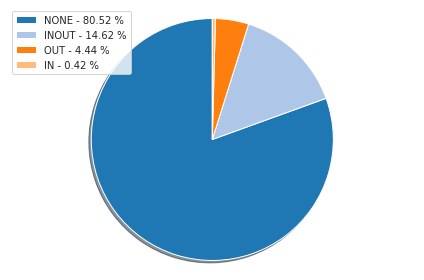

In [11]:
print(dfMobileDataActivityGB)
pieOthers(dfMobileDataActivityGB['mobile_data_activity'],dfMobileDataActivityGB['count'],0)

  roaming_enabled     count
0              No  23092438
1             Yes    441407


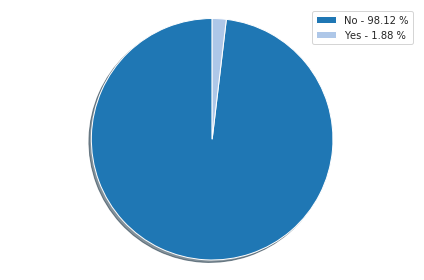

In [12]:
print(dfRoamingEnabledGB)
pieOthers(dfRoamingEnabledGB['roaming_enabled'],dfRoamingEnabledGB['count'],0)

  wifi_status     count
2     ENABLED  15533545
0    DISABLED   7991740
4     UNKNOWN      4180
3    ENABLING      3171
1   DISABLING      1209


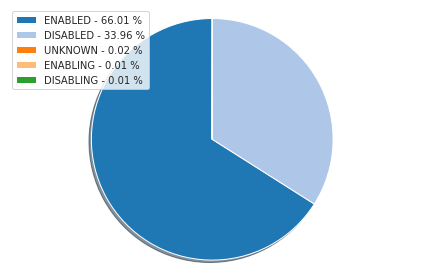

In [13]:
print(dfWifiStatusGB)
pieOthers(dfWifiStatusGB['wifi_status'],dfWifiStatusGB['count'],0)

  wifi_ap_status     count
0       DISABLED  23313222
2        ENABLED    210673
5        UNKNOWN      8098
4         FAILED      1291
1      DISABLING       331
3       ENABLING       230


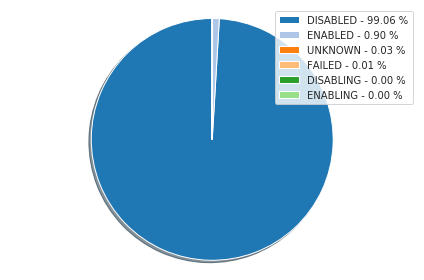

In [14]:
print(dfWifiApStatusGB)
pieOthers(dfWifiApStatusGB['wifi_ap_status'],dfWifiApStatusGB['count'],0)

      network_operator    count
1823           UNKNOWN  3570986
1913        VODAFONE P  1687002
1596         TELKOMSEL  1193101
1087               NOS  1120480
210         ALTICE MEO   705097
55                   3   621116
1518            TELCEL   550945
836                MEO   501692
898           MOVISTAR   417308
382              CLARO   399640
1853              VIVO   364016
703    INDOSAT OOREDOO   344964
386           CLARO BR   279146
1836  VERIZON WIRELESS   275221
270               AXIS   269140
843           METROPCS   256601
1410         SMARTFREN   227484
1154            ORANGE   225904
142             AIRTEL   220205
1982         XL AXIATA   212107


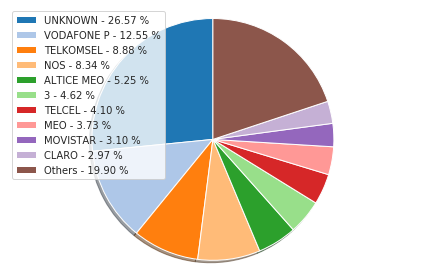

In [15]:
print(dfNetworkOperatorGB)
pieOthers(dfNetworkOperatorGB['network_operator'],dfNetworkOperatorGB['count'],10)

        sim_operator    count
814          UNKNOWN  6495128
489              NOS  1111531
719        TELKOMSEL   771251
67        ALTICE MEO   716404
8                  3   634666
678           TELCEL   603612
390              MEO   568351
318  INDOSAT OOREDOO   524682
753              TIM   441418
167            CLARO   432372
428         MOVISTAR   420877
837             VIVO   392886
626        SMARTFREN   345828
868       VODAFONE P   334435
902        XL AXIATA   311584
25            AIRTEL   276969
824          VERIZON   273733
519           ORANGE   267262
899              WTF   266229
103             AXIS   255969


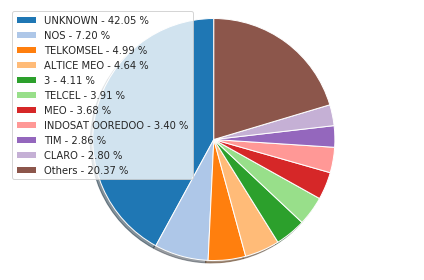

In [16]:
print(dfSimOperatorGB)
pieOthers(dfSimOperatorGB['sim_operator'],dfSimOperatorGB['count'],10)